##  Objective of This Project

To **build a classification model** that will predict **whether a loan would be approved or not.**

## Dataset Description

**From [Kaggle](https://www.kaggle.com/)**

- [Load Prediction Dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset)
- **Attributes:** Loan_ID, 	Gender, Married Dependents,	Education, Self_Employed, Applicant Income, Coapplicant Income, Loan Amount, Loan_Amount_Term, Credit_History	and Property_Area


# Loan Prediction Analysis - Classification

## Importing Modules

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset From Drive

### Adding Google Drive

In [153]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading dataset

In [154]:
#loading dataset into pandas dataframe
loanpredictionDF = pd.read_csv('/content/drive/MyDrive/Dataset/Loan Prediction Dataset/train_u6lujuX_CVtuZ9i.csv')
loanpredictionDF.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
# number of rows and columns
print("(Rows, columns): " + str(loanpredictionDF.shape))

(Rows, columns): (614, 13)


In [156]:
#checking some basic statistics
loanpredictionDF.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [157]:
#some other information
loanpredictionDF.info()
#13 attributes, 4 of type float, 1 of type integer and others are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##Preprocessing the Dataset

In [158]:
#finding null values
loanpredictionDF.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [159]:
# fill the missing values for numerical terms - mean (Loan amount, Loan amount term and credit history)

#fill the null values of loan amounts using mean of the column, this will replace all null values with the mean 
loanpredictionDF['LoanAmount'] = loanpredictionDF['LoanAmount'].fillna(loanpredictionDF['LoanAmount'].mean())

#fill the null values of loan amount term using mean of the column, this will replace all null values with the mean 
loanpredictionDF['Loan_Amount_Term'] = loanpredictionDF['Loan_Amount_Term'].fillna(loanpredictionDF['Loan_Amount_Term'].mean())

#fill the null values of credit history using mean of the column, this will replace all null values with the mean 
loanpredictionDF['Credit_History'] = loanpredictionDF['Credit_History'].fillna(loanpredictionDF['Credit_History'].mean())

In [160]:
# fill the missing values for categorical terms - mode (Gender, Marrital status, Dependents and Self employed)
loanpredictionDF['Gender'] = loanpredictionDF["Gender"].fillna(loanpredictionDF['Gender'].mode()[0])
loanpredictionDF['Married'] = loanpredictionDF["Married"].fillna(loanpredictionDF['Married'].mode()[0])
loanpredictionDF['Dependents'] = loanpredictionDF["Dependents"].fillna(loanpredictionDF['Dependents'].mode()[0])
loanpredictionDF['Self_Employed'] = loanpredictionDF["Self_Employed"].fillna(loanpredictionDF['Self_Employed'].mode()[0])

In [161]:
#checking if there still exists any other null values
loanpredictionDF.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [162]:
#

## Exploratory Data Analysis and Visualization

### Visualization of Categorical attributes

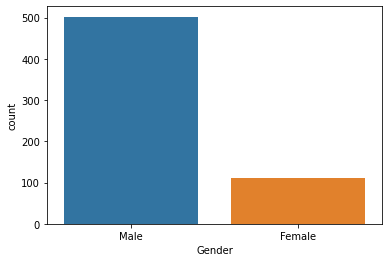

In [163]:
# visualization of categorical attributes - (Gender)
sns.countplot(loanpredictionDF['Gender'])

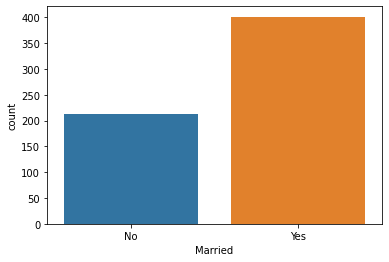

In [164]:
# visualization of categorical attributes - (Married)
sns.countplot(loanpredictionDF['Married'])

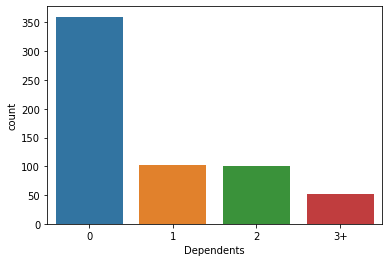

In [165]:
# visualization of categorical attributes - (Dependents)
sns.countplot(loanpredictionDF['Dependents'])

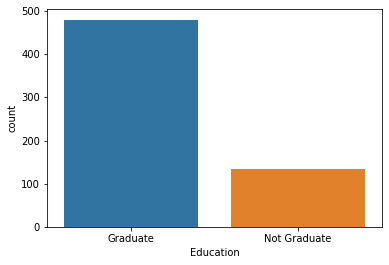

In [166]:
# visualization of categorical attributes - (Education)
sns.countplot(loanpredictionDF['Education'])

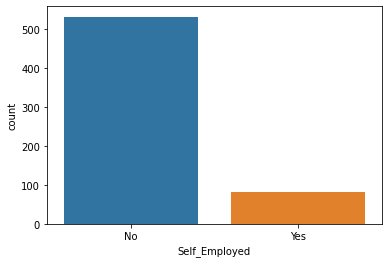

In [167]:
# visualization of categorical attributes - (Self_Employed)
sns.countplot(loanpredictionDF['Self_Employed'])

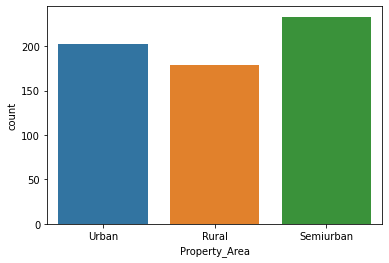

In [168]:
# visualization of categorical attributes - (Property_Area)
sns.countplot(loanpredictionDF['Property_Area'])

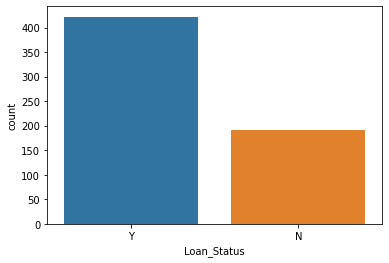

In [169]:
# visualization of categorical attributes - (Loan_Status)
sns.countplot(loanpredictionDF['Loan_Status'])

### Visualization of Numerical attributes

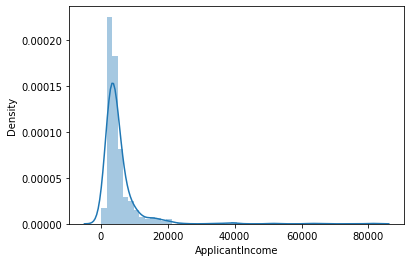

In [170]:
# visualization of categorical attributes - (ApplicantIncome)
sns.distplot(loanpredictionDF["ApplicantIncome"])

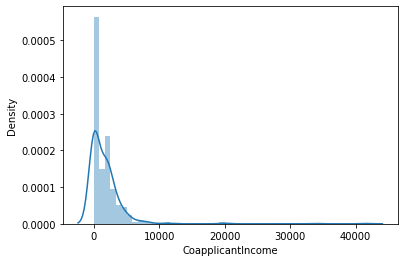

In [171]:
# visualization of categorical attributes - (CoapplicantIncome)
sns.distplot(loanpredictionDF["CoapplicantIncome"])

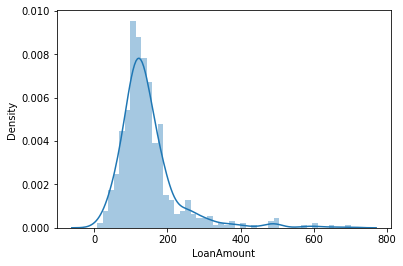

In [172]:
# visualization of categorical attributes - (LoanAmount)
sns.distplot(loanpredictionDF["LoanAmount"])

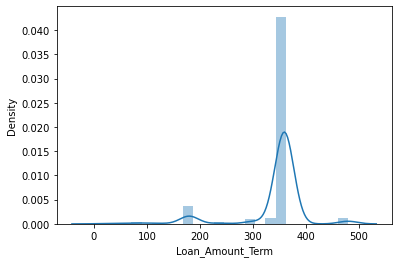

In [173]:
# visualization of categorical attributes - (Loan_Amount_Term)
sns.distplot(loanpredictionDF['Loan_Amount_Term'])

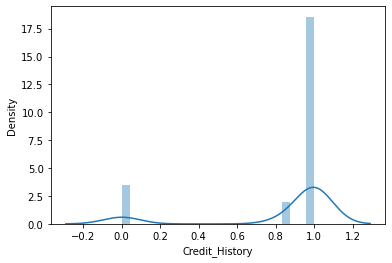

In [174]:
# visualization of categorical attributes - (Credit_History)
sns.distplot(loanpredictionDF['Credit_History'])

### Creating New Attributes

In [175]:
# New attrbiute total income, applicant income and co applicant income is added to measure the co income
loanpredictionDF['Total_Income'] = loanpredictionDF['ApplicantIncome'] + loanpredictionDF['CoapplicantIncome']
loanpredictionDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Log tranformation 

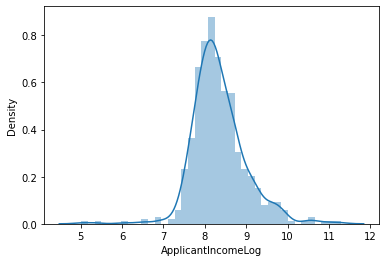

In [176]:
# apply log transformation to the attribute ApplicantIncome
loanpredictionDF['ApplicantIncomeLog'] = np.log(loanpredictionDF['ApplicantIncome']+1)
sns.distplot(loanpredictionDF["ApplicantIncomeLog"])

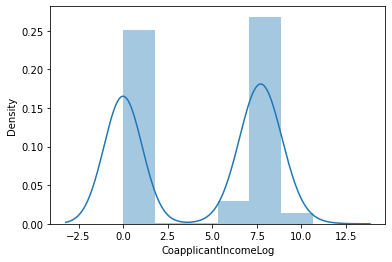

In [177]:
# apply log transformation to the attribute CoapplicantIncome
loanpredictionDF['CoapplicantIncomeLog'] = np.log(loanpredictionDF['CoapplicantIncome']+1)
sns.distplot(loanpredictionDF["CoapplicantIncomeLog"])

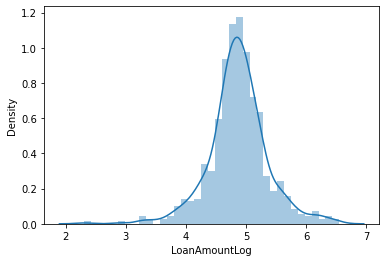

In [178]:
# apply log transformation to the attribute LoanAmount
loanpredictionDF['LoanAmountLog'] = np.log(loanpredictionDF['LoanAmount']+1)
sns.distplot(loanpredictionDF["LoanAmountLog"])

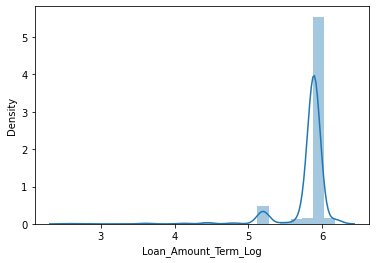

In [179]:
# apply log transformation to the attribute Loan_Amount_Term
loanpredictionDF['Loan_Amount_Term_Log'] = np.log(loanpredictionDF['Loan_Amount_Term']+1)
sns.distplot(loanpredictionDF["Loan_Amount_Term_Log"])

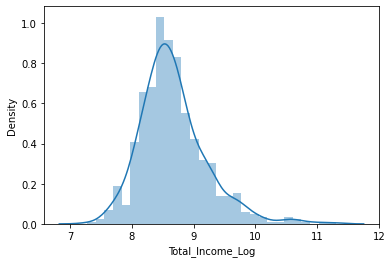

In [180]:
# apply log transformation to the attribute Total_Income
loanpredictionDF['Total_Income_Log'] = np.log(loanpredictionDF['Total_Income']+1)
sns.distplot(loanpredictionDF["Total_Income_Log"])

## Correlation Matrix

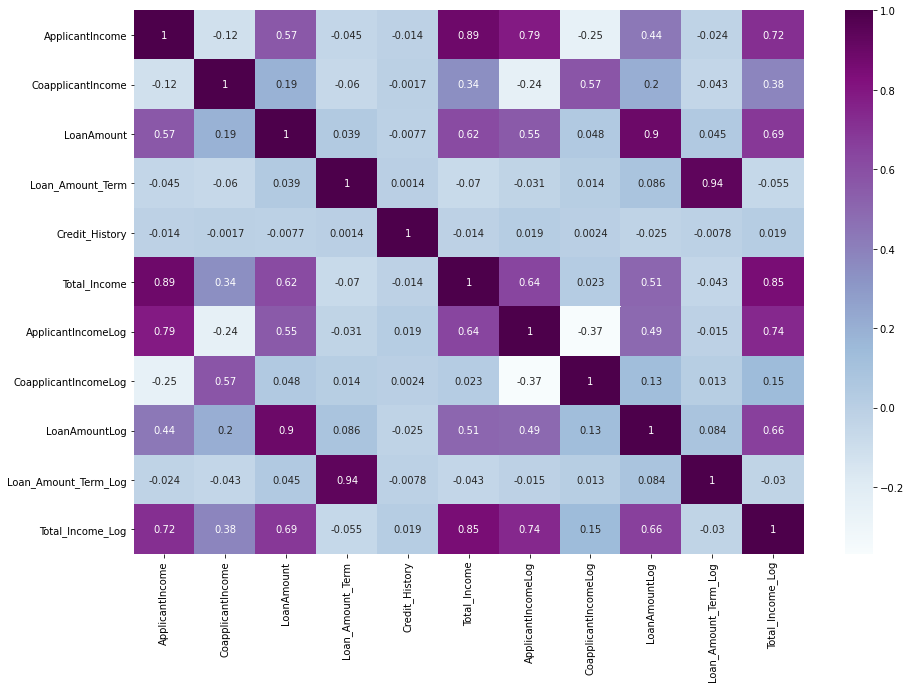

In [181]:
corr = loanpredictionDF.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [182]:
loanpredictionDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [183]:
#drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loanpredictionDF = loanpredictionDF.drop(columns=cols, axis=1)
loanpredictionDF.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


## Label Encoding

In [184]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loanpredictionDF[col] = le.fit_transform(loanpredictionDF[col])

In [185]:
loanpredictionDF.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


## Train Test Split

In [186]:
# specify input and output attributes
x = loanpredictionDF.drop(columns=['Loan_Status'], axis=1)  #input attribute, need to drop output attribute
y = loanpredictionDF['Loan_Status']  #output

In [187]:
from sklearn.model_selection import train_test_split
#test size, 75% data will be used for training 
#we use random state for avoiding getting different test and train data split so that test results remain same
#otherwise each time of running tjhe code it will show different output
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

##Model Training

In [188]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    #split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    #fit the model
    model.fit(x_train, y_train)
    print("Accuracy =", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation =",np.mean(score)*100)

### Logistic Regression


In [189]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy = 77.27272727272727
Cross validation = 80.9462881514061


### Decision Tree Classifier

In [190]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy = 72.07792207792207
Cross validation = 71.015593762495


### Random Forest Classifier

In [191]:

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy = 77.92207792207793
Cross validation = 78.3433293349327


### Trees classifier

In [192]:

model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy = 75.97402597402598
Cross validation = 76.87591630014661


### xgboost

In [193]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, x, y)

Accuracy = 77.27272727272727
Cross validation = 79.15767026522724


## Hyperparamtere tuning

In [194]:
#to improve the accuracy
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)


Accuracy = 75.97402597402598
Cross validation = 80.12928162068506


## Confusion Matrix

Confusion matrix is a summary of prediction results on a classification problem. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [195]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
#y_pred
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[25, 29],
       [ 3, 97]])

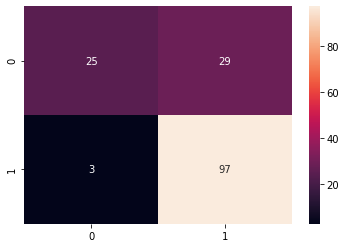

In [197]:
#visualize
sns.heatmap(conf_matrix, annot=True)